In [103]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [104]:
import torch
if torch.cuda.is_available():    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla K80


In [105]:
!pip install transformers

In [106]:
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/MinorProject/hin_train.csv")
df=df.drop(columns=['ID','Sub-task B'])
df=df.rename(columns={"Sub-task A":"label"})
df.head()

,Text,label
0,Bollywood film dekhne ke samay logic ghar mein...,NAG
1,Chutiya movie...,NAG
2,Us jaat bnde ka khene ka matlab tha mar daluga...,OAG
3,@Feminism Is CANCER *un feminist yeh sahi hai ...,OAG
4,Amrit Anand अब तो जुड़े ही है उनको बोलो जुड़ने,NAG


In [0]:
# df2=pd.read_csv('/content/drive/My Drive/MinorProject/hin_dev.csv')
# df2=df2.drop(columns=['ID','Sub-task B'])
# df2=df2.rename(columns={"Sub-task A":"label"})
# df2.head()

In [108]:
df3=pd.read_csv('/content/drive/My Drive/MinorProject/agr_hi_dev.csv',names=['File_ID','Text','label'])
df3=df3.drop(columns=['File_ID'])
df3.head()

,Text,label
0,RANDTV tumhare najayaz baap is area hai ki wah...,OAG
1,First stage par dus jootey khaye Grover se,OAG
2,Salman aur aamir ki kounsi movie release huyee...,OAG
3,Wk aur bhakt aa gya. Abe americans ka bolna h...,CAG
4,Beta to tu apne baap ka hai ...permission to t...,NAG


In [109]:
df4=pd.read_csv('/content/drive/My Drive/MinorProject/agr_hi_fb_gold.csv',names=['File_ID','Text','label'])
df4=df4.drop(columns=['File_ID'])
df4.head()

,Text,label
0,Abe movi m bhi dhrm agya kya paglpnti h ye,OAG
1,Badnam Gujat kutte ki olaad madrchod Pakistani...,OAG
2,Modi ji aap ek bar Up ka CM ko ye afar de fir ...,CAG
3,Kya hota hai ji jb koi pm bn jaata hai to itna...,CAG
4,मुसलमान अपना धर्म तो जानते नही लेकिन काँपी कर ...,OAG


In [110]:
df5=pd.read_csv('/content/drive/My Drive/MinorProject/agr_hi_tw_gold.csv',names=['File_ID','Text','label'])
df5=df5.drop(columns=['File_ID'])
df5.head()

,Text,label
0,Tera baap bambani h .. bambani .. ambani nhi #...,CAG
1,Aaj wicket jane per khushi kaam ho hai.... #IN...,NAG
2,चौका मारकर इतना उड़ रहे हो 😳 सालों छक्का मारा त...,OAG
3,RT @ErVishalInsan: #BlockBusterMSG #MustWatchM...,NAG
4,शिट #IndvsPak,CAG


In [111]:
df=pd.concat([df,df3,df4,df5])
df.shape

(9149, 2)

In [112]:
df['label'] = df['label'].map({'OAG': 0, 'CAG':1,'NAG':2})
df.head()

,Text,label
0,Bollywood film dekhne ke samay logic ghar mein...,2
1,Chutiya movie...,2
2,Us jaat bnde ka khene ka matlab tha mar daluga...,0
3,@Feminism Is CANCER *un feminist yeh sahi hai ...,0
4,Amrit Anand अब तो जुड़े ही है उनको बोलो जुड़ने,2


In [0]:
sentences = df.Text.values
labels = df.label.values

In [114]:
sentences

array(['Bollywood film dekhne ke samay logic ghar mein chorke ana parta hain.  \nPlease logic mat ghusao',
       'Chutiya movie...',
       'Us jaat bnde ka khene ka matlab tha mar daluga use but gand fat gyi camera\ndekh ke chutiya sala shkl se hi frustrated lag rha hai for sure ye bnda andar\nhi andar gay hoga but iski andar ita dum nahi hoga ki confess kre tabhi sala\nage bhi apne bacho mai khaouf fila rha hai ..chutiya kahinka',
       ...,
       'Swatch Bharat Abhiyaan ki shurvaat aaj Dilli se hui hai! Bharat vasiyon se nivedan hai, kripaya jhaadu chalaye! #AAPSweep @AamAadmiParty',
       'RT @iamkrishnam: Kya kya Ban karthe miyan ye bhakt loga? Charminaar ka dum biryani nakko Ban karon miyan. #BeefBan',
       'अफ़्रीकी टीम के सदस्यों का कहना भी ठीक ही है की आज सारे पाकिस्तानी हमारी जीत की दुआ कर रहे थे इसलिए हम मैच हार गए। #IndvsSA'],
      dtype=object)

In [115]:
labels

array([2, 2, 0, ..., 0, 0, 1])

In [0]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [117]:
input_ids = []
for sent in sentences:
    encoded_sent = tokenizer.encode(
                        sent, 
                        add_special_tokens = True,
                   )
    input_ids.append(encoded_sent)

Token indices sequence length is longer than the specified maximum sequence length for this model (1838 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (734 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (767 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1618 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (588 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for t

In [118]:
print('Max sentence length: ', max([len(sen) for sen in input_ids]))

Max sentence length:  2103


In [0]:
from keras.preprocessing.sequence import pad_sequences
MAX_LEN = 100
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", 
                          value=0, truncating="post", padding="post")

In [0]:
attention_masks = []
for sent in input_ids:
    att_mask = [int(token_id > 0) for token_id in sent]
    attention_masks.append(att_mask)

In [0]:
from sklearn.model_selection import train_test_split
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, 
                                                            random_state=42, test_size=0.1)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, labels,
                                             random_state=42, test_size=0.1)


In [0]:
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [0]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
batch_size = 32
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)


In [124]:
from transformers import BertForSequenceClassification, AdamW, BertConfig
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels = 3, 
    output_attentions = False,
    output_hidden_states = False,
)
model.cuda()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [125]:
params = list(model.named_parameters())
print('The BERT model has {:} different named parameters.\n'.format(len(params)))
print('==== Embedding Layer ====\n')
for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))
print('\n==== First Transformer ====\n')
for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))
print('\n==== Output Layer ====\n')
for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [0]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5,
                  eps = 1e-8
                )


In [0]:
from transformers import get_linear_schedule_with_warmup
epochs = 4
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

In [0]:
import numpy as np
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [0]:
import time
import datetime

def format_time(elapsed):
    elapsed_rounded = int(round((elapsed)))
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [130]:
import random
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)
loss_values = []
for epoch_i in range(0, epochs):
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')
    t0 = time.time()
    total_loss = 0
    model.train()
    for step, batch in enumerate(train_dataloader):
        if step % 40 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        model.zero_grad()        
        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        loss = outputs[0]
        total_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()
    avg_train_loss = total_loss / len(train_dataloader)            
    loss_values.append(avg_train_loss)
    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))
    print("")
    print("Running Validation...")
    t0 = time.time()
    model.eval()
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    for batch in validation_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        with torch.no_grad():
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        logits = outputs[0]
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    258.    Elapsed: 0:00:39.
  Batch    80  of    258.    Elapsed: 0:01:18.
  Batch   120  of    258.    Elapsed: 0:01:57.
  Batch   160  of    258.    Elapsed: 0:02:36.
  Batch   200  of    258.    Elapsed: 0:03:16.
  Batch   240  of    258.    Elapsed: 0:03:55.

  Average training loss: 0.98
  Training epcoh took: 0:04:12

Running Validation...
  Accuracy: 0.57
  Validation took: 0:00:10

======== Epoch 2 / 4 ========
Training...
  Batch    40  of    258.    Elapsed: 0:00:39.
  Batch    80  of    258.    Elapsed: 0:01:18.
  Batch   120  of    258.    Elapsed: 0:01:58.
  Batch   160  of    258.    Elapsed: 0:02:37.
  Batch   200  of    258.    Elapsed: 0:03:16.
  Batch   240  of    258.    Elapsed: 0:03:55.

  Average training loss: 0.85
  Training epcoh took: 0:04:12

Running Validation...
  Accuracy: 0.62
  Validation took: 0:00:10

======== Epoch 3 / 4 ========
Training...
  Batch    40  of    258.    Elapsed: 0:00:39.
  

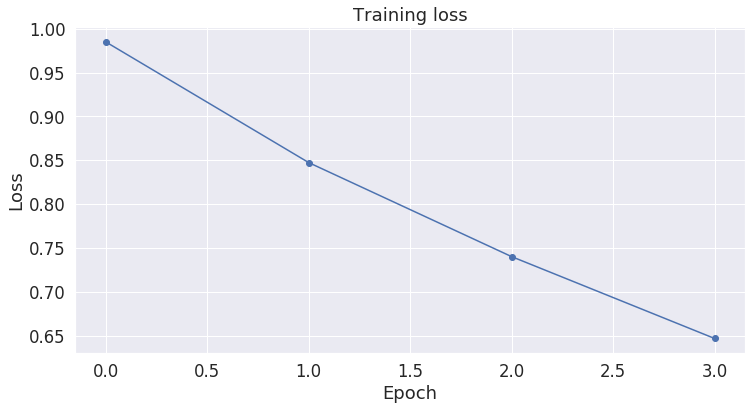

In [131]:
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)
plt.plot(loss_values, 'b-o')
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [132]:
df1 = pd.read_csv("/content/drive/My Drive/MinorProject/hin_dev.csv")
df1=df1.drop(columns=['ID','Sub-task B'])
print('Number of test sentences: {:,}\n'.format(df1.shape[0]))
df1=df1.rename(columns={"Sub-task A":"label"})
df1['label'] = df1['label'].map({'OAG': 0, 'CAG':1,'NAG':2})
df.head()

Number of test sentences: 997



,Text,label
0,Bollywood film dekhne ke samay logic ghar mein...,2
1,Chutiya movie...,2
2,Us jaat bnde ka khene ka matlab tha mar daluga...,0
3,@Feminism Is CANCER *un feminist yeh sahi hai ...,0
4,Amrit Anand अब तो जुड़े ही है उनको बोलो जुड़ने,2


In [0]:

sentences = df1.Text.values
labels = df1.label.values


In [134]:
input_ids = []
for sent in sentences:
    encoded_sent = tokenizer.encode(
                        sent,                     
                        add_special_tokens = True, 
                                           )
    
    input_ids.append(encoded_sent)
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, 
                          dtype="long", truncating="post", padding="post")
attention_masks = []
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask) 
prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)
prediction_labels = torch.tensor(labels)
batch_size = 32  
prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Token indices sequence length is longer than the specified maximum sequence length for this model (577 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (651 > 512). Running this sequence through the model will result in indexing errors


In [135]:

print('Predicting labels for {:,} test sentences...'.format(len(prediction_inputs)))
model.eval()
predictions , true_labels = [], []
for batch in prediction_dataloader:
  batch = tuple(t.to(device) for t in batch)
  b_input_ids, b_input_mask, b_labels = batch  
  with torch.no_grad():
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  predictions.append(logits) 
  true_labels.append(label_ids)


Predicting labels for 997 test sentences...


In [136]:
print('Positive samples: %d of %d (%.2f%%)' % (df.label.sum(), len(df.label), (df.label.sum() / len(df.label) * 100.0)))

Positive samples: 9533 of 9149 (104.20%)


In [137]:
from sklearn.metrics import classification_report
clf_set = []
for i in range(len(true_labels)):
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  
  # Calculate and store the coef for this batch.  
  clf = classification_report(true_labels[i], pred_labels_i)                
  clf_set.append(clf)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [138]:
flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()
flat_true_labels = [item for sublist in true_labels for item in sublist]
clf= classification_report(flat_true_labels, flat_predictions)
print(clf)

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       208
           1       0.43      0.49      0.46       211
           2       0.83      0.79      0.81       578

    accuracy                           0.69       997
   macro avg       0.63      0.63      0.63       997
weighted avg       0.70      0.69      0.70       997

